<b>Importing necessary libraries</b>

In [1]:
import pandas as pd # Importing pandas library to perform operation on dataframe
import numpy as np
import matplotlib.pyplot as plt # Importing matplotlib to visualise data points
import seaborn as sns
sns.set(style="darkgrid")
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv('.\\Datasets\\hrdata.csv') # Importing dataset
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
data.describe() # Statistical information about the variables

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
data.info() # Checking data type of the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


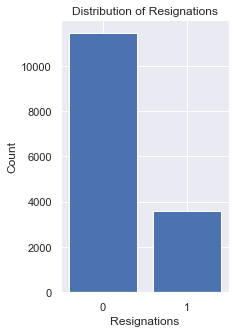

In [5]:
data['left'] = data['left'].astype(str)
fig = plt.figure(figsize=(3,5))
distribution = data.left.value_counts()
plt.bar(distribution.index,distribution.values)
plt.xlabel('Resignations')
plt.ylabel('Count')
plt.title('Distribution of Resignations')
plt.show()

array([[<AxesSubplot:title={'center':'satisfaction_level'}>,
        <AxesSubplot:title={'center':'last_evaluation'}>],
       [<AxesSubplot:title={'center':'number_project'}>,
        <AxesSubplot:title={'center':'average_montly_hours'}>]],
      dtype=object)

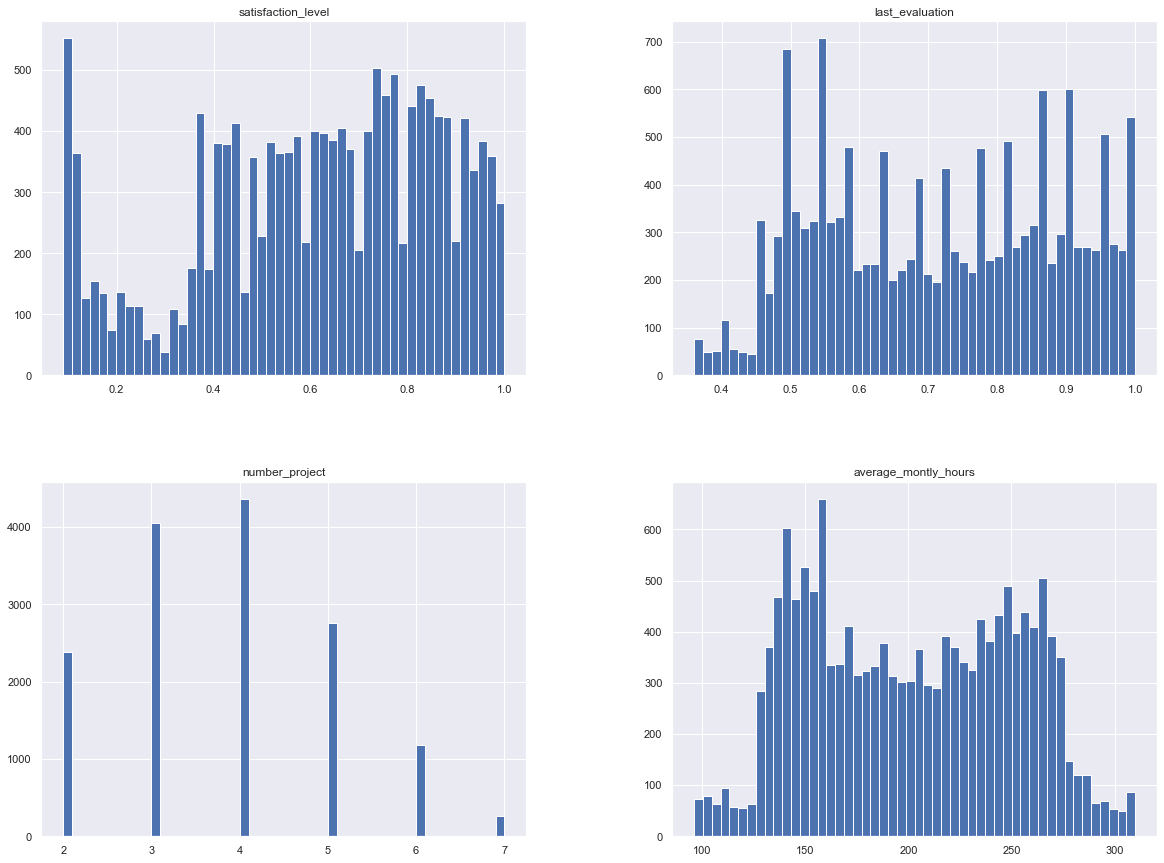

In [6]:
df = data[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours']]
df.hist(bins = 50, figsize=(20,15))

<b>Impact of salary on employee retention</b>

<AxesSubplot:xlabel='salary'>

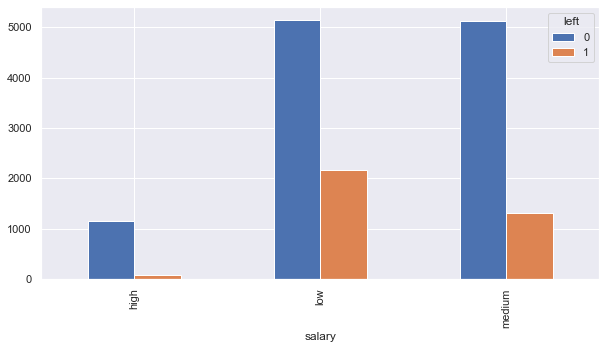

In [7]:
pd.crosstab(data.salary,data.left).plot(kind = 'bar',figsize = (10,5))

<b>Graph shows high salaries are not likely to leave company</b>

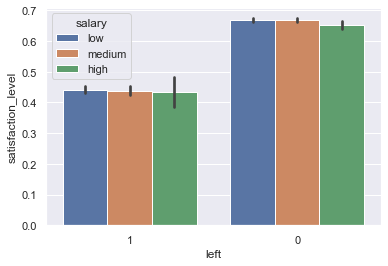

In [8]:
ax = sns.barplot(x="left", y="satisfaction_level", hue="salary", data=data)

<b>Impact of department on employee retention</b>

<AxesSubplot:xlabel='Department'>

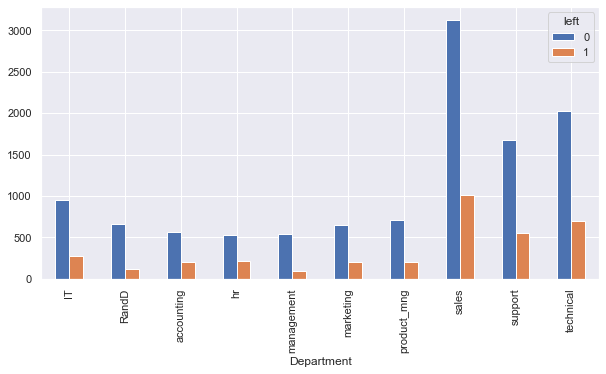

In [9]:
pd.crosstab(data.Department,data.left).plot(kind = 'bar',figsize = (10,5))

<b>Impact of Working Hours on employee retention</b>

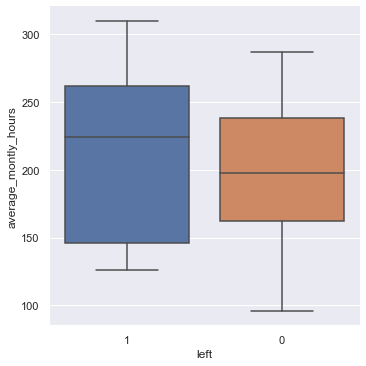

In [10]:
sns.catplot(x="left", y="average_montly_hours", data=data, kind="box")

<b>Impact of Number of Projects on employee retention</b>

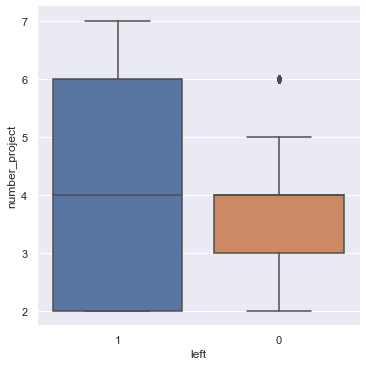

In [11]:
sns.catplot(x="left", y="number_project", data=data, kind="box")

<b>Graph shows higher time spent in a company are not likely to leave</b>

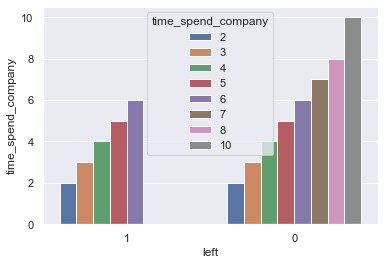

In [13]:
ax = sns.barplot(x="left", y="time_spend_company", hue="time_spend_company", data=data)

<b>Impact of Evaluation on employee retention</b>

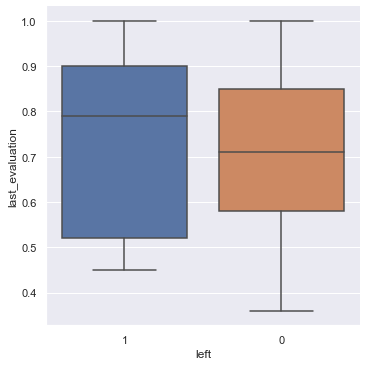

In [14]:
sns.catplot(x="left", y="last_evaluation", data=data, kind="box")

<b>Dynamic relationship between average montly hours, salary, left and promotion in last 5 years</b>

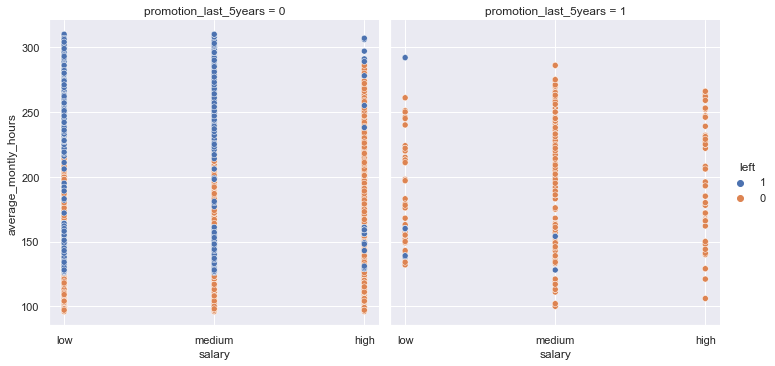

In [15]:
sns.relplot(x="salary", y="average_montly_hours", hue="left",
            col="promotion_last_5years", data=data)

<b>Dynamic relationship between average montly hours, salary, left</b>

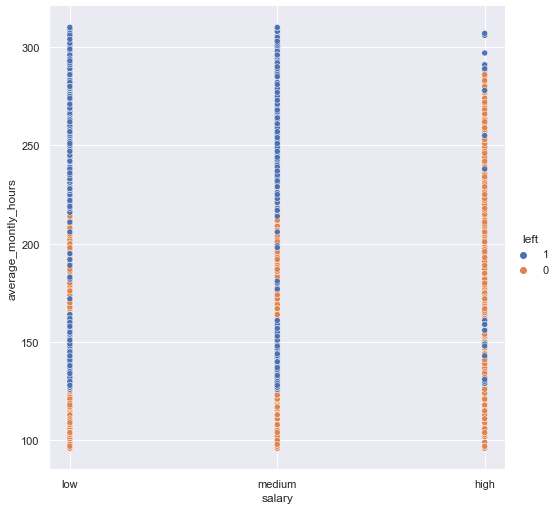

In [16]:
sns.relplot(x="salary", y="average_montly_hours", hue="left", data=data,height = 7)

<b>Splitting the dataframe into training and testing set</b>

In [17]:
from sklearn.model_selection import train_test_split

Independent = data.drop('left',axis=1)
y = data['left']
x = pd.get_dummies(Independent, prefix= None,drop_first=True)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 100)

<b>Validating most important features</b>

Text(0, 0.5, 'Feature Importance')

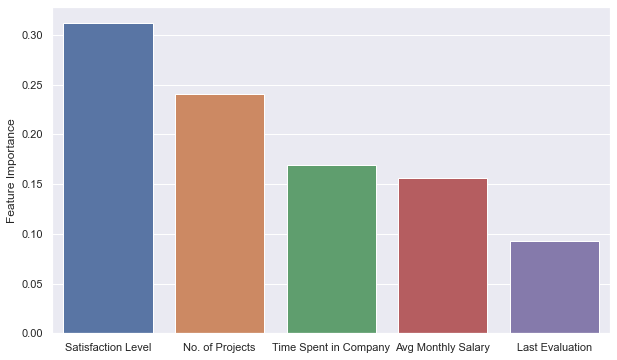

In [18]:
from sklearn.ensemble import RandomForestClassifier

feature_model = RandomForestClassifier(max_depth= 6, n_estimators= 50)
features = feature_model.fit(x_train, y_train)
feature_importance = pd.Series(features.feature_importances_, index = x_train.columns)

# Plotting the top 5 features
plt.figure(figsize = (10,6))
f_x = ['Satisfaction Level','No. of Projects','Time Spent in Company',
       'Avg Monthly Salary','Last Evaluation']
plotting_y = feature_importance.nlargest(5)
plotting_y = sorted(plotting_y,reverse=True)
sns.barplot(f_x,plotting_y)
plt.ylabel('Feature Importance')

<b>Scaling the dataset</b>

In [19]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.fit_transform(x_test)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

<b>Dictionary of models and parameters for choosing best combination</b>

In [21]:
# Parameter Grid
model_params = {
    'support_vector':{
        'model':SVC(),
        'params':{
            'C':[1,10,20],
            'gamma':[1.0,1.5,2.0]
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[20, 50, 75],
            'max_depth':[4,5,6]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(),
        'params':{
            'C':[1,10,20],
            'solver':['lbfgs', 'liblinear']
        }
    },
    'nb_G':{
        'model':GaussianNB(),
        'params':{
            'var_smoothing':[1e-09,1e-08,1e-07]
        }
    },
    'Decision_tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            'max_depth':[3,4]
        }
    }
}

In [22]:
# Appending the score in a list after fitting the model to each parameter for best result
from sklearn.model_selection import GridSearchCV

scores = []
for model_name,mp in model_params.items(): # Iteration of items in the dictionary above
    clf = GridSearchCV(mp['model'],mp['params'],cv = 5,return_train_score = False)
    clf.fit(x_train_scaled, y_train)
    scores.append({
        'model':model_name,
        'best':clf.best_score_, # Best score of the model
        'best_param':clf.best_params_  # Best parameter combination of the model
    })
    
scores

[{'model': 'support_vector',
  'best': 0.9735979052418358,
  'best_param': {'C': 10, 'gamma': 1.5}},
 {'model': 'random_forest',
  'best': 0.9695085025443406,
  'best_param': {'max_depth': 6, 'n_estimators': 50}},
 {'model': 'logistic_regression',
  'best': 0.7830916654315498,
  'best_param': {'C': 10, 'solver': 'lbfgs'}},
 {'model': 'nb_G',
  'best': 0.7213082752828418,
  'best_param': {'var_smoothing': 1e-09}},
 {'model': 'Decision_tree',
  'best': 0.9684412034978509,
  'best_param': {'criterion': 'gini', 'max_depth': 4}}]

<b>Support Vector Machine Classifier has the highest score</b>

In [23]:
model = SVC(C= 10, gamma= 1.5)
model.fit(x_train_scaled,y_train)
preds = model.predict(x_test_scaled)

In [27]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, preds, labels = ['1','0'])
cnf_matrix

array([[ 875,   45],
       [  32, 2798]], dtype=int64)

Text(30.5, 0.5, 'Truth')

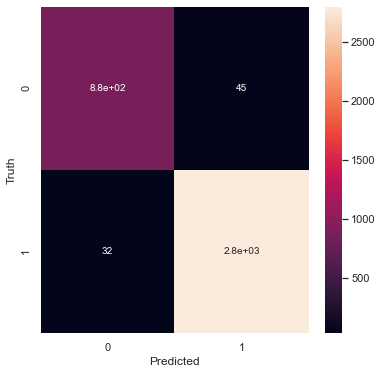

In [30]:
plt.figure(figsize = (6,6))
sns.heatmap(cnf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2830
           1       0.96      0.95      0.96       920

    accuracy                           0.98      3750
   macro avg       0.97      0.97      0.97      3750
weighted avg       0.98      0.98      0.98      3750



<b>Balancing the dataset using SMOTE: Synthetic Minority Oversampling Technique</b>

In [35]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE() # Over representation of minority class to handle imbalance
x_train_smote, y_train_smote = oversample.fit_resample(x_train_scaled, y_train)

In [36]:
model_smote = SVC(C= 10, gamma= 1.5)
model_smote.fit(x_train_smote,y_train_smote)
preds_smote = model_smote.predict(x_test_scaled)
cnf_matrix_smote = confusion_matrix(y_test, preds_smote, labels = ['1','0'])
cnf_matrix_smote

array([[ 878,   42],
       [  48, 2782]], dtype=int64)

In [37]:
print(classification_report(y_test, preds_smote))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2830
           1       0.95      0.95      0.95       920

    accuracy                           0.98      3750
   macro avg       0.97      0.97      0.97      3750
weighted avg       0.98      0.98      0.98      3750



<b>Handling class imbalance using BalancedBaggingClassifier</b>

In [40]:
from imblearn.ensemble import BalancedBaggingClassifier

bbc = BalancedBaggingClassifier(base_estimator=SVC(C= 10, gamma= 1.5), 
                                sampling_strategy='auto',  replacement=False,random_state=0)
bbc.fit(x_train_scaled, y_train)
y_pred_bbc = bbc.predict(x_test_scaled)
cnf_matrix_bbc = confusion_matrix(y_test, y_pred_bbc, labels = ['1','0'])
cnf_matrix_bbc

array([[ 869,   51],
       [  41, 2789]], dtype=int64)

In [41]:
print(classification_report(y_test, y_pred_bbc))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2830
           1       0.95      0.94      0.95       920

    accuracy                           0.98      3750
   macro avg       0.97      0.97      0.97      3750
weighted avg       0.98      0.98      0.98      3750

